In [39]:
import json
import tweepy 
import os
import numpy as np
import time

In [40]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = "C:/Users/Jana/Desktop/json_keys/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']


In [41]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [52]:
# Target Search Term
target_user = ("@NBCOlympics", "@Olympics", "@pyeongchang2018")
# "Real Person" Filters
min_tweets = 1
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

sentiment_array = []
oldest_tweet = ""

In [53]:
for target in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    olympics_text_list = []
    text = ''
    for x in range(5):
        time.sleep(1)
        public_tweets = api.search(target, count=100,
                                   result_type="recent",
                                   max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            text += ' '
            text += tweet['text']
            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
            oldest_tweet = tweet["id_str"]
            
    # Store the Average Sentiments
    sentiment = {"User": target_user,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}
    olympics_text_list.append(text)
    # Print the Sentiments
    print(sentiment)
    print("")


{'User': ('@NBCOlympics', '@Olympics', '@pyeongchang2018'), 'Compound': 0.10975559566787005, 'Positive': 0.076162454873646215, 'Neutral': 0.023906137184115522, 'Negative': 0.89994584837545111, 'Tweet Count': 277}

{'User': ('@NBCOlympics', '@Olympics', '@pyeongchang2018'), 'Compound': 0.33575163398692814, 'Positive': 0.16247712418300653, 'Neutral': 0.018078431372549018, 'Negative': 0.81943790849673204, 'Tweet Count': 153}

{'User': ('@NBCOlympics', '@Olympics', '@pyeongchang2018'), 'Compound': 0.21326222222222221, 'Positive': 0.091316666666666671, 'Neutral': 0.0084944444444444434, 'Negative': 0.90017777777777785, 'Tweet Count': 180}



In [54]:
print(f"User: {target_user}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

User: ('@NBCOlympics', '@Olympics', '@pyeongchang2018')
Compound: 0.21326222222222221
Positive: 0.09131666666666667
Neutral: 0.9001777777777779
Negative: 0.008494444444444443


In [55]:
olympics_text_list

[' RT @BTSUKUNITE: Anyone watching the @pyeongchang2018 #OpeningCeremony?\n\n@BTS_twt "DNA" was played as Cyprus, Chinese Taipei, Thailand, Turk… RT @pyeongchang2018: Historical moment as Korean athletes unite as one as they march into #PyeongChang2018\n우리 선수들이 #2018평창 동계올림픽 개회식 선수 입장의… RT @pyeongchang2018: The Grand Olympic Winter Games PyeongChang 2018 Opening Ceremony have come to an end. Let’s have a listen to the main… RT @TamarWrites: Now that the @pyeongchang2018 #Olympics are finally here in earnest, a lot of people have been asking about who is perform… RT @lucaseguibar: Cumplir años así!!! Un orgullo representar a mi país en los Juegos Olímpicos de @pyeongchang2018\n ¡Vamos #España ! ¿Que t… RT @pyeongchang2018: 소망의 불꽃을 밝혀줘서 고마워요 #김연아\nThank you for lighting up our wish and dream of peace. #KOR\n_____\n#PyeongChang2018 #Last #torch… RT @RuchirLModi: While #cricket took on the snow &amp; cold yesterday, the 23rd Olympic Winter Games gear up today. @pyeongchang2018 #SportsFor… 

In [56]:
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [57]:
clean_tweets = clean_tweet(olympics_text_list[0])
clean_tweets = clean_tweets.replace('pyeongchang2018', '')
clean_tweets = clean_tweets.replace('RT', '')
clean_tweets = clean_tweets.replace('pyeongchang', '')
clean_tweets = clean_tweets.replace('Pyeongchang', '')
clean_tweets = clean_tweets.replace('SouthKorea', '')
clean_tweets = clean_tweets.replace('Korea', '')
clean_tweets

' Anyone watching the OpeningCeremony twt DNA was played as Cyprus Chinese Taipei Thailand Turk  Historical moment as n athletes unite as one as they march into PyeongChang2018 2018  The Grand Olympic Winter Games PyeongChang 2018 Opening Ceremony have come to an end Let s have a listen to the main  Now that the Olympics are finally here in earnest a lot of people have been asking about who is perform  Cumplir a os as Un orgullo representar a mi pa s en los Juegos Ol mpicos de Vamos Espa a Que t  Thank you for lighting up our wish and dream of peace KOR PyeongChang2018 Last torch  While cricket took on the snow amp cold yesterday the 23rd Olympic Winter Games gear up today SportsFor Good luck to all of the athletes competing in including the 22 Pac 12 delegates from six differen Homemade donuts for the Opening Ceremonies  olympics  exo chanyeol  Thank you for lighting up our wish and dream of peace KOR PyeongChang2018 Last torch  While cricket took on the snow amp cold yesterday the 23

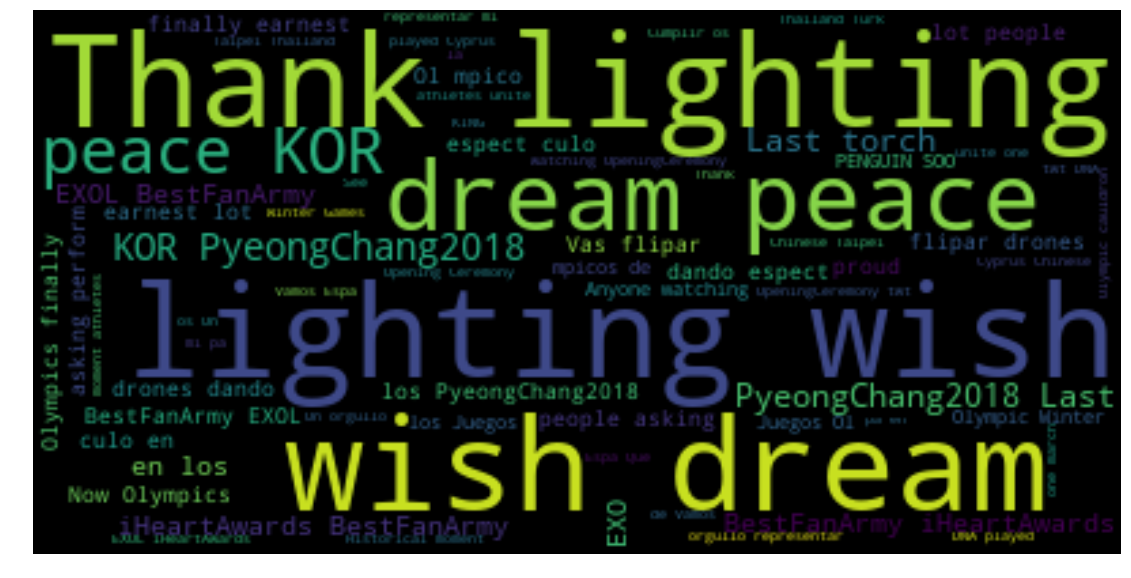

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(clean_tweets)
import matplotlib.pyplot as plt
# lower max_font_size
wc = WordCloud(width=1600, height=800, max_words=1000, colormap="winter").generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



#plt.savefig('olympics.png', bbox_inches='tight')


plt.show()